In [1]:
import numpy as np
 
import pandas as pd
 
np.random.seed(42)
 
n_customers = 100
 
first_names = ['James', 'Mary', 'John', 'Patricia', 'Robert', 'Jennifer',
 
               'Michael', 'Linda', 'William', 'Elizabeth', 'David', 'Susan',
 
               'Richard', 'Jessica', 'Joseph', 'Sarah', 'Thomas', 'Karen',
 
               'Charles', 'Nancy', 'Christopher', 'Lisa', 'Daniel', 'Margaret']

last_names = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia',
 
              'Miller', 'Davis', 'Rodriguez', 'Martinez', 'Hernandez', 'Lopez',
 
              'Gonzalez', 'Wilson', 'Anderson', 'Thomas', 'Taylor', 'Moore',
 
              'Jackson', 'Martin', 'Lee', 'Perez', 'Thompson', 'White']
 
data = {
 
    'first_name': np.random.choice(first_names, n_customers),
 
    'last_name' : np.random.choice(last_names, n_customers),
 
    'age': np.random.randint(18, 70, n_customers),
 
    'annual_income': np.random.random_sample(100)*1000,
 
    'spending_score': np.random.randint(1, 100, n_customers),
 
}

df = pd.DataFrame(data)
 
print(df)

df.to_csv("customer_data.csv", index=False)

 

   first_name  last_name  age  annual_income  spending_score
0     Michael      Davis   66     663.501769              30
1       Nancy      White   54       5.061584              19
2      Joseph  Hernandez   66     160.808051              17
3       David    Jackson   34     548.733789              63
4       Linda     Taylor   66     691.895198              19
..        ...        ...  ...            ...             ...
95    Michael     Martin   57     540.635122              46
96    William      Lopez   37     637.429901               2
97   Margaret     Miller   52     726.091334              35
98      James    Johnson   65     975.852079              87
99      Susan   Williams   42     516.300348              81

[100 rows x 5 columns]


In [2]:
import numpy as np

import pandas as pd

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

features = ['age', 'spending_score']

X = df[features].copy()

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

kmeans.fit(X_scaled)

labels = kmeans.labels_

centroids_scaled = kmeans.cluster_centers_

centroids_original = scaler.inverse_transform(centroids_scaled)

df = df.copy()

df['cluster'] = labels

cluster_names = {}

for i, c in enumerate(centroids_original):

    age, spending_score = c  # matches 'features' order


    if age < 30 and spending_score < 50:

        cluster_names[i] = "Young Low Income"

    elif age < 30 and spending_score >= 50:

        cluster_names[i] = "Young High Income"

    elif age >= 30 and spending_score < 50:

        cluster_names[i] = "Old Low Income"

    else:  # age >= 30 and spending_score >= 50

        cluster_names[i] = "Old High Income"


df['cluster_name'] = df['cluster'].map(cluster_names)

print(df.head())

print("\nCluster counts:\n", df['cluster'].value_counts())

print("\nCluster names mapping:", cluster_names)

# 8) Predict for a new customer

# IMPORTANT: Keep the same feature order and scale with the SAME scaler

new_customer = np.array([[20, 61]])  # [age, spending_score]

new_customer_scaled = scaler.transform(new_customer)

pred_label = kmeans.predict(new_customer_scaled)[0]

pred_name = cluster_names[pred_label]

print(f"\nNew customer {new_customer.tolist()[0]} -> cluster {pred_label} ({pred_name})")
 

  first_name  last_name  age  annual_income  spending_score  cluster  \
0    Michael      Davis   66     663.501769              30        1   
1      Nancy      White   54       5.061584              19        1   
2     Joseph  Hernandez   66     160.808051              17        1   
3      David    Jackson   34     548.733789              63        2   
4      Linda     Taylor   66     691.895198              19        1   

        cluster_name  
0     Old Low Income  
1     Old Low Income  
2     Old Low Income  
3  Young High Income  
4     Old Low Income  

Cluster counts:
 cluster
0    29
1    26
3    24
2    21
Name: count, dtype: int64

Cluster names mapping: {0: 'Old High Income', 1: 'Old Low Income', 2: 'Young High Income', 3: 'Old Low Income'}

New customer [20, 61] -> cluster 2 (Young High Income)


c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[200.00000000000003, 120.98450218301863, 86.47714776780069, 46.49492599152515, 42.755905191654755, 33.52197057673625, 29.2551934748386, 22.391068930913647, 19.451375289047245, 17.649070155775934]


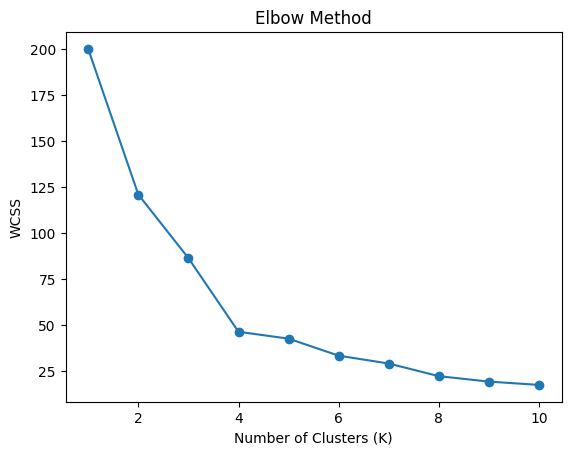

   first_name  last_name  age  annual_income  spending_score  cluster  \
0     Michael      Davis   66     663.501769              30        1   
1       Nancy      White   54       5.061584              19        1   
2      Joseph  Hernandez   66     160.808051              17        1   
3       David    Jackson   34     548.733789              63        2   
4       Linda     Taylor   66     691.895198              19        1   
..        ...        ...  ...            ...             ...      ...   
95    Michael     Martin   57     540.635122              46        1   
96    William      Lopez   37     637.429901               2        3   
97   Margaret     Miller   52     726.091334              35        1   
98      James    Johnson   65     975.852079              87        0   
99      Susan   Williams   42     516.300348              81        0   

         cluster_name  
0      Old Low Income  
1      Old Low Income  
2      Old Low Income  
3   Young High Income  
4  

c:\Users\Administrator\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [6]:
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
print(wcss)

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

df['cluster_name'] = df['cluster'].map(cluster_names)
print(df)

print(df['cluster'].value_counts())

#prediction


new_customer = [[56, 16]] 

new_customer_scaled = scaler.transform(new_customer)

predicted_cluster = kmeans.predict(new_customer_scaled)

print("Predicted cluster:", predicted_cluster)